In [425]:
#%reset

In [426]:
%%capture
pip install kagglehub

In [427]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns 
import numpy as np


In [428]:
print("Current directory:", os.getcwd())

Current directory: /Users/olamideolayinka/anaconda3/PYTHON/Project/test


In [429]:
# Download the dataset
os.system('kaggle datasets download -d mlg-ulb/creditcardfraud')  # from web address https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


0

In [430]:
os.system('chmod 600 /Users/olamideolayinka/.kaggle/kaggle.json')

0

In [431]:
# Unzip it
os.system("unzip -o creditcardfraud.zip")

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


0

In [432]:
# read downloaded 
df = pd.read_csv("creditcard.csv")

In [433]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [434]:
df.shape

(284807, 31)

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [436]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [437]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

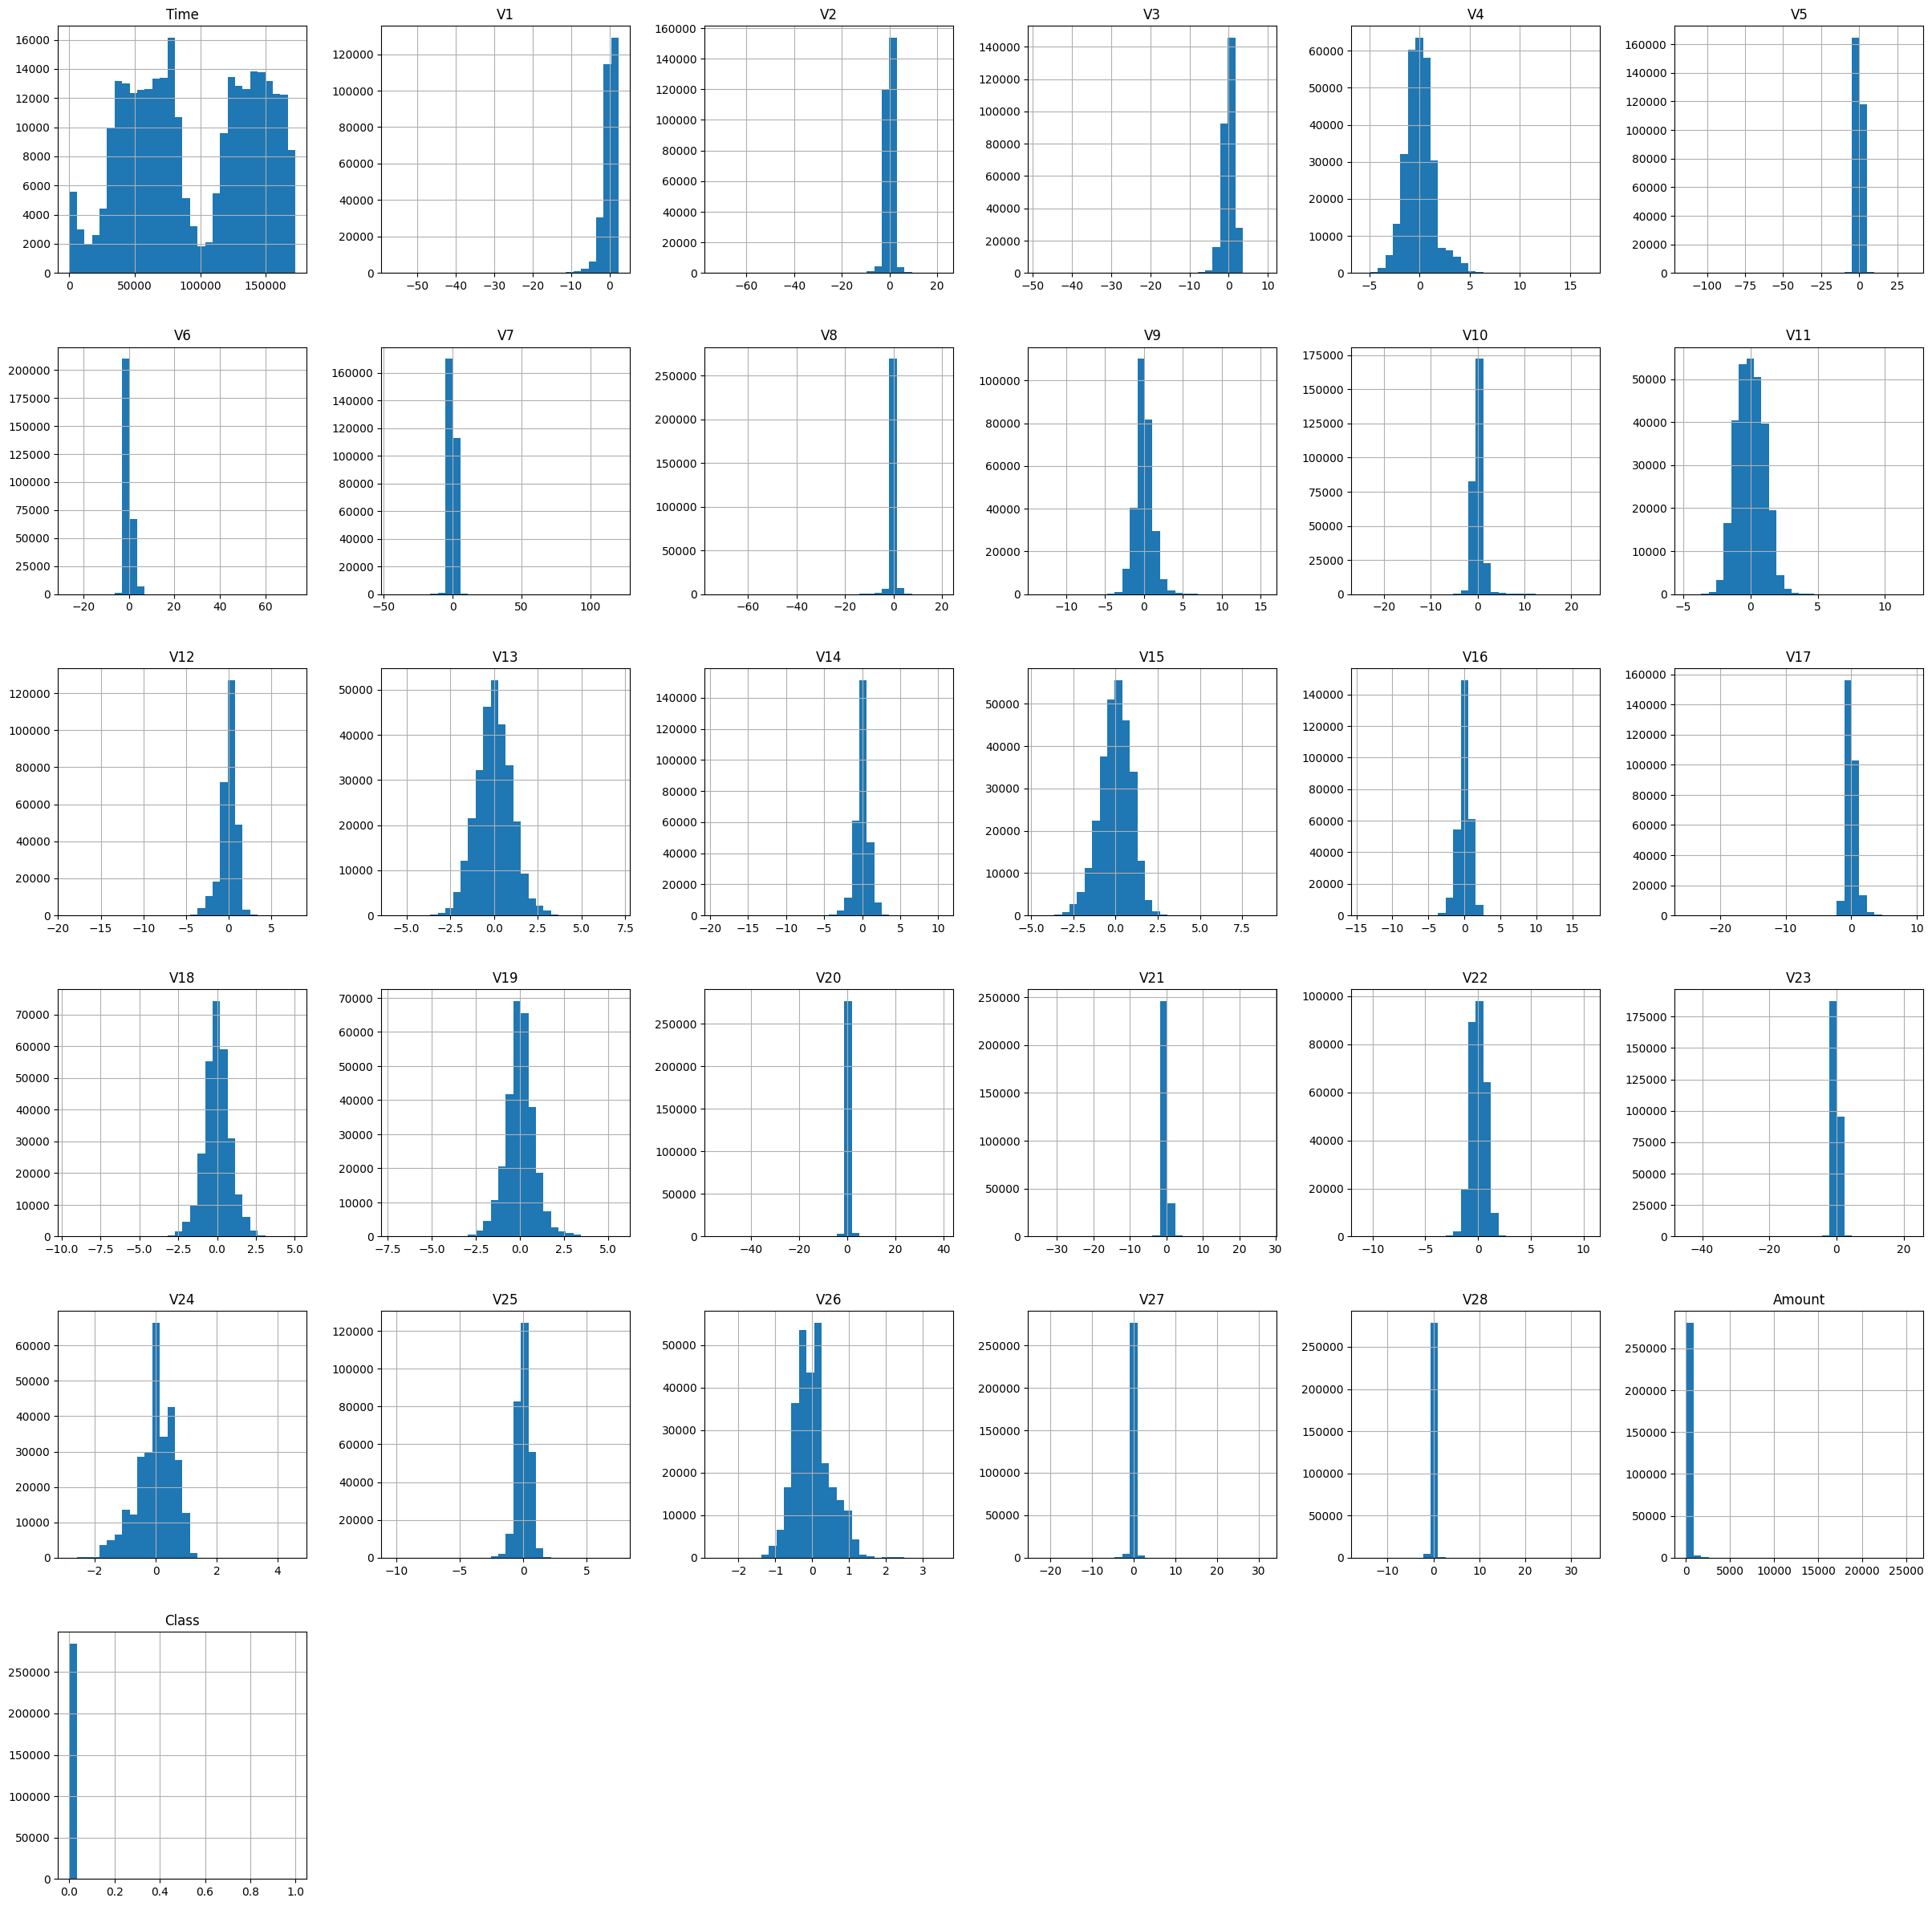

In [438]:
df.hist(bins =30, figsize=(30,30))

In [439]:
df.isnull().sum().value_counts()

0    31
dtype: int64

In [440]:
df.count().value_counts()

284807    31
dtype: int64

In [441]:
df.iloc[:, 1:30].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000



# Each row in the dataset represents a credit card transaction. The last variable in the table above is called Class and represents the target variable. The objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's retrieve basic statistics about the target variable.

# Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.

In [442]:
# get the set of distinct classes
labels = df.Class.unique()
labels 

array([0, 1])

In [443]:
# get the count of each Class
sizes = df.Class.value_counts().values
sizes

array([284315,    492])

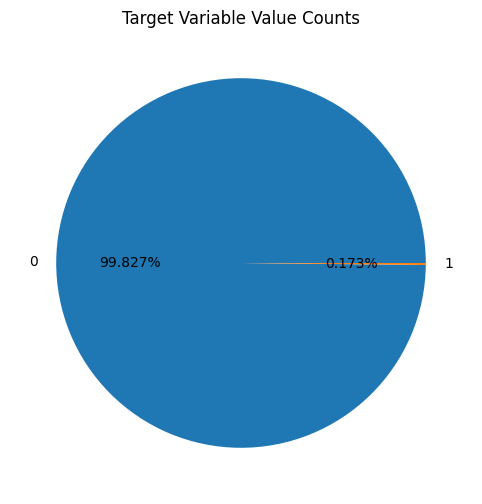

In [444]:
# plot the class value counts
fig, ax = plt.subplots(figsize = (10,6))
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

# 0: Legitimate credit card transaction. 
# 1: Fraud credit card transaction.

### This is a binary classification problem; a highly unbalanced one, based on the proportions of the target variable. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

### It is also prudent to understand which features affect the model in what way. Lets visualize the effect of the different features on the model.

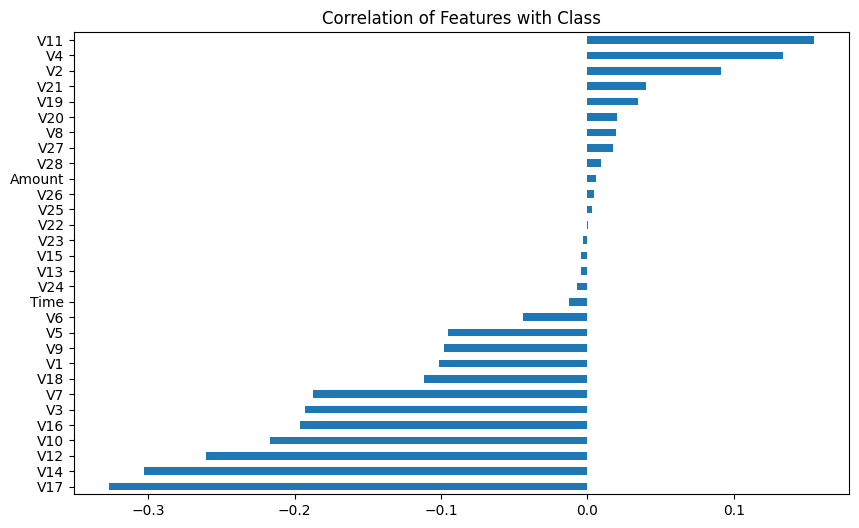

In [445]:
correlation_values = df.corr()['Class'].drop('Class')
correlation_values.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Correlation of Features with Class")
plt.show()

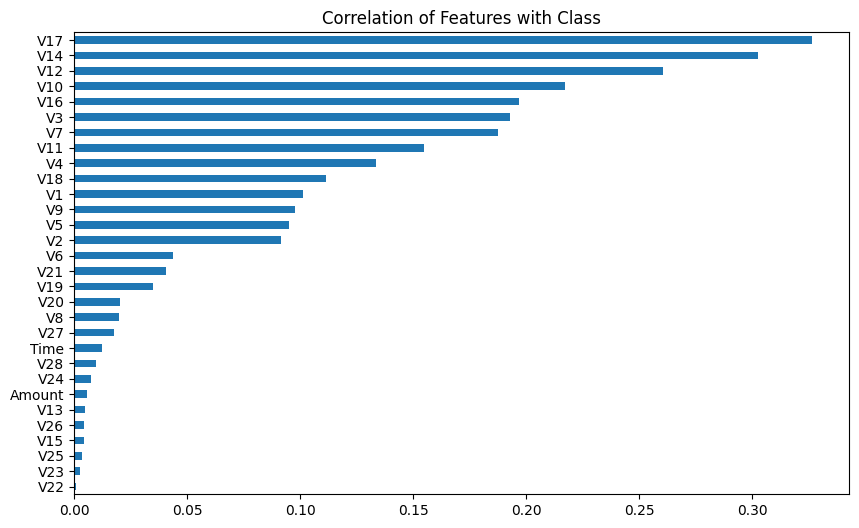

In [446]:

correlation_values.abs().sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Correlation of Features with Class")
plt.show()

In [447]:
df.corr().drop('Class')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.188326e-16,-1.164018e-15,-9.082889e-16,2.085924e-17,-6.343731e-16,-1.018099e-15,-2.557889e-16,-1.347621e-16,...,-2.444306e-16,-4.201199e-16,6.217312e-16,-4.385333e-17,-9.832396e-16,-1.745526e-17,1.196577e-16,2.108702e-15,-0.227709,-0.101347
V2,-0.010593,4.188326e-16,1.000000e+00,3.140164e-16,-1.125909e-15,5.230686e-16,2.781752e-16,1.857398e-16,-5.698764e-17,2.006267e-17,...,-8.277282e-17,1.547272e-16,1.668081e-16,1.577058e-17,-4.530958e-16,1.984817e-16,-4.938067e-16,-5.182198e-16,-0.531409,0.091289
V3,-0.419618,-1.164018e-15,3.140164e-16,1.000000e+00,4.644369e-16,-5.483554e-17,1.627805e-15,5.239200e-16,-1.297365e-15,5.725902e-16,...,5.931009e-17,-1.115726e-15,-5.063673e-16,5.605700e-19,-1.118857e-15,-1.389572e-16,1.058098e-15,9.792787e-16,-0.210880,-0.192961
V4,-0.105260,-9.082889e-16,-1.125909e-15,4.644369e-16,1.000000e+00,-1.722056e-15,-7.565957e-16,-4.188169e-16,5.645256e-16,6.873528e-16,...,-1.862123e-16,-3.949686e-17,9.564529e-17,1.569977e-16,6.026069e-16,-4.237973e-16,4.577343e-17,-3.888959e-18,0.098732,0.133447
V5,0.173072,2.085924e-17,5.230686e-16,-5.483554e-17,-1.722056e-15,1.000000e+00,2.208263e-16,2.691713e-16,7.396815e-16,7.178142e-16,...,-3.990893e-16,1.277735e-16,-8.760100e-18,-1.142295e-15,5.021165e-16,4.450164e-16,6.538203e-16,-3.301835e-18,-0.386356,-0.094974
V6,-0.063016,-6.343731e-16,2.781752e-16,1.627805e-15,-7.565957e-16,2.208263e-16,1.000000e+00,1.213776e-16,-1.030439e-16,4.234240e-16,...,5.551919e-17,5.756004e-18,9.443837e-17,-1.070899e-15,4.568884e-16,-1.402561e-16,-4.500879e-16,2.493919e-16,0.215981,-0.043643
V7,0.084714,-1.018099e-15,1.857398e-16,5.239200e-16,-4.188169e-16,2.691713e-16,1.213776e-16,1.000000e+00,3.549393e-16,1.125386e-15,...,-2.122235e-16,-8.840620e-16,-4.458969e-16,9.812896e-18,-2.881866e-16,-9.494990e-16,-1.723845e-15,-2.921030e-16,0.397311,-0.187257
V8,-0.036949,-2.557889e-16,-5.698764e-17,-1.297365e-15,5.645256e-16,7.396815e-16,-1.030439e-16,3.549393e-16,1.000000e+00,4.340695e-16,...,3.830431e-16,2.065947e-16,6.910016e-17,-9.701203e-17,-4.609097e-16,-1.777597e-16,1.280491e-16,-6.187506e-16,-0.103079,0.019875
V9,-0.008660,-1.347621e-16,2.006267e-17,5.725902e-16,6.873528e-16,7.178142e-16,4.234240e-16,1.125386e-15,4.340695e-16,1.000000e+00,...,1.874693e-16,-6.976879e-16,-5.221067e-16,-1.449529e-16,6.679328e-16,-8.154251e-16,-6.111140e-17,1.106537e-15,-0.044246,-0.097733


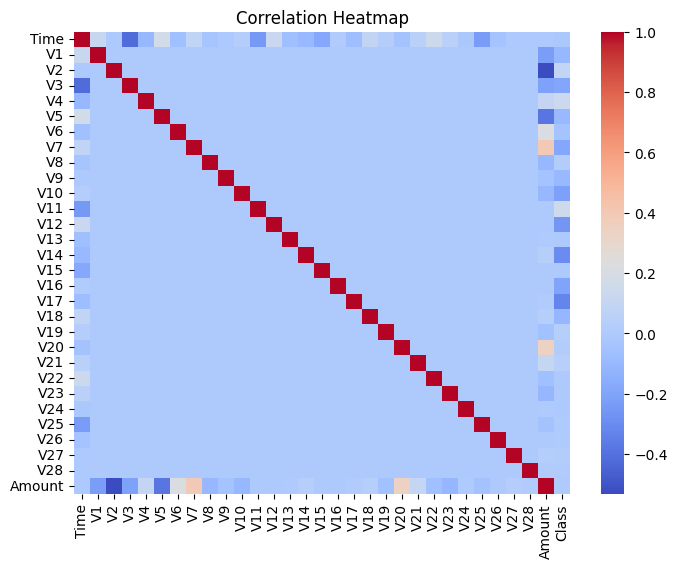

In [448]:
plt.figure(figsize=(8, 6)) # Set the figure size
sns.heatmap(df.corr().drop('Class'),  cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [449]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [450]:
# standardize features by removing the mean and scaling to unit variance
#df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
#data_matrix = df.values
#data_matrix

In [451]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [452]:
df.duplicated().any()

True

In [453]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [454]:
df.duplicated().sum()

1081

In [455]:
df = df.drop_duplicates()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [456]:
df.shape

(283726, 31)

In [457]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [458]:
# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = df.iloc[:, 0:30]#.values

# y: target variable
y = df.iloc[:, 30]

In [459]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [460]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [461]:
# data normalization
#X = normalize(X, norm="l1")

In [462]:
#pd.DataFrame(X).describe()

In [463]:
# A function to store the performance of each classifier model
def ML_models_performance(model, X_train, y_train ,X_test ,y_test, y_pred, test_probs, model_name):
    performance_df=pd.DataFrame({'Train_accuracy':model.score(X_train,y_train),"Test_accuracy":model.score(X_test,y_test),
                       "Precision":precision_score(y_test, y_pred),"Recall":recall_score(y_test, y_pred),
                       "F1_Score":f1_score(y_test,y_pred), "roc_auc_score":roc_auc_score(y_test, test_probs)}, index=[model_name])  #test_probs[:, 1] removed becuase test_probs is already a 1D array, so trying to do test_probs[:, 1] is one index too many.
    return performance_df

## Dataset Train/Test Split

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

In [465]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
226238,144549.0,2.238954,-1.724499,-2.151484,-2.577803,0.993668,3.565492,-1.785957,0.860122,-1.264003,...,-0.323810,-0.149574,-0.049333,0.278442,0.684735,-0.219028,-0.159167,0.037920,-0.049932,32.00
134253,80716.0,-1.315062,1.630783,0.597001,-0.038359,-0.404580,-0.965712,0.212249,0.735381,-1.267926,...,-0.067580,-0.238898,-0.946773,0.323904,0.515632,-0.713000,-0.266503,-0.017794,0.051058,6.99
186465,127116.0,1.908801,0.021184,-2.087997,0.129310,1.161468,0.605244,-0.022371,0.180296,0.283819,...,-0.210474,0.293609,1.095842,-0.044874,-1.689517,0.106098,0.007758,0.045164,-0.053068,14.95
149493,91342.0,1.811257,0.316556,0.316751,3.880231,0.048454,1.020163,-0.734868,0.233651,0.681423,...,-0.228032,0.138869,0.700422,0.174064,0.702997,-0.212523,-0.010018,-0.017740,-0.038006,17.30
18461,29522.0,1.358817,-1.120881,0.550266,-1.547659,-1.194950,0.275448,-1.201843,0.212889,-2.094285,...,-0.361686,-0.340972,-0.636442,0.252758,-0.344160,-0.064282,-0.439622,0.062524,0.013095,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225116,144113.0,-0.098309,-0.382823,0.202726,-0.732301,0.336342,-0.253872,0.837947,-0.402611,-1.424484,...,0.028820,0.154790,1.009327,0.002124,-0.462865,-0.422526,0.010597,0.041090,-0.004501,124.00
3525,3013.0,-1.708940,-1.296255,1.953170,-2.277028,-0.510388,0.408807,0.329231,0.477331,1.058119,...,0.557379,0.466843,0.860939,0.361317,-0.264732,0.423478,0.065689,-0.026392,0.077562,261.80
242674,151594.0,-0.875424,1.159992,0.573970,1.178888,-0.206267,0.260623,0.371124,0.443532,-0.011588,...,-0.353885,-0.100597,-0.157726,0.049751,-0.014156,-0.513855,-0.771982,-0.242970,0.094879,37.00
60594,49395.0,1.247036,0.348595,0.589407,0.982998,-0.222000,-0.452687,-0.012336,-0.140168,0.052173,...,-0.042753,-0.211495,-0.556038,0.037106,-0.133330,0.403622,-0.595756,0.043911,0.032002,5.00


In [466]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86568,61290.0,1.228821,-0.063408,0.274145,0.647465,-0.048135,0.372073,-0.224231,0.079939,0.640759,...,-0.096566,-0.129554,-0.083779,-0.151661,-0.700372,0.598550,0.491409,0.002989,0.001782,11.50
251557,155394.0,-0.203154,1.176678,-0.759595,-0.518472,0.629649,-0.721675,0.638893,0.243377,-0.157488,...,-0.098429,0.384629,1.206754,-0.082753,0.508386,-0.710906,-0.234510,0.379640,0.261351,1.94
20232,30881.0,-1.672836,1.401297,1.503940,2.175491,0.699791,1.062139,1.114364,-0.535822,-0.252983,...,0.828472,-0.525950,-0.408743,-0.280083,-0.846468,-0.155456,-0.062383,0.007777,0.113900,91.28
68952,53203.0,0.819379,-1.124913,0.515025,0.513945,-1.009048,0.488484,-0.580672,0.187686,-0.999142,...,-0.110144,-0.057205,-0.168061,-0.198732,-0.337408,0.238538,-0.289454,0.038214,0.058407,228.00
191852,129429.0,2.009701,0.105635,-1.752759,0.588312,0.374801,-0.637884,0.009260,-0.129487,0.492619,...,-0.135479,0.008970,0.357394,-0.013472,-0.446920,0.111522,0.642944,-0.036998,-0.043404,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56516,47464.0,-1.162452,0.795672,1.953356,1.654216,1.069023,-0.183501,0.093182,0.377642,-1.362161,...,0.023948,0.258460,0.502164,-0.121908,0.094908,-0.078996,-0.084585,0.093070,0.146178,2.00
188431,127974.0,-2.023289,2.214345,-2.097511,-1.041892,-0.120896,-0.027650,-0.595211,1.820963,-0.391636,...,0.014967,-0.202295,-0.810599,0.165183,-0.360040,-0.103692,0.173059,0.060668,-0.003436,9.99
115561,73912.0,1.180651,-0.199219,1.233565,0.869184,-1.138767,-0.315881,-0.660840,0.103571,1.011595,...,-0.134275,-0.097776,-0.114066,0.037897,0.419476,0.236291,0.318145,0.013352,0.026229,9.14
187644,127623.0,2.061059,0.136698,-1.830805,0.206364,0.705093,-0.326154,0.107304,-0.093259,0.184680,...,-0.102156,-0.332798,-0.861005,0.274903,0.113347,-0.219966,0.176290,-0.063574,-0.043578,0.89


# RobustScaler uses median and IQR to handle outliers while maintaing data's shape. StandardScaler adjusts data to have a mean of 0 and standard deviation of 1 but it is sensitive to outliers. MinMaxScaler will scales data to a fixed range ([0, 1]) but extreme values can affect results

In [467]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

Rscaler = RobustScaler()
MinMax = MinMaxScaler()

X_train['Amount']= Rscaler.fit_transform(X_train[['Amount']])
X_test['Amount']= Rscaler.transform(X_test[['Amount']])
X_train['Time']= MinMax.fit_transform(X_train[['Time']])
X_test['Time']= MinMax.transform(X_test[['Time']])

In [468]:
pd.DataFrame(y_train).value_counts()

Class
0        226602
1           378
dtype: int64

In [469]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
226238,0.836549,2.238954,-1.724499,-2.151484,-2.577803,0.993668,3.565492,-1.785957,0.860122,-1.264003,...,-0.323810,-0.149574,-0.049333,0.278442,0.684735,-0.219028,-0.159167,0.037920,-0.049932,0.137472
134253,0.467128,-1.315062,1.630783,0.597001,-0.038359,-0.404580,-0.965712,0.212249,0.735381,-1.267926,...,-0.067580,-0.238898,-0.946773,0.323904,0.515632,-0.713000,-0.266503,-0.017794,0.051058,-0.209119
186465,0.735659,1.908801,0.021184,-2.087997,0.129310,1.161468,0.605244,-0.022371,0.180296,0.283819,...,-0.210474,0.293609,1.095842,-0.044874,-1.689517,0.106098,0.007758,0.045164,-0.053068,-0.098808
149493,0.528624,1.811257,0.316556,0.316751,3.880231,0.048454,1.020163,-0.734868,0.233651,0.681423,...,-0.228032,0.138869,0.700422,0.174064,0.702997,-0.212523,-0.010018,-0.017740,-0.038006,-0.066242
18461,0.170853,1.358817,-1.120881,0.550266,-1.547659,-1.194950,0.275448,-1.201843,0.212889,-2.094285,...,-0.361686,-0.340972,-0.636442,0.252758,-0.344160,-0.064282,-0.439622,0.062524,0.013095,0.026608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225116,0.834026,-0.098309,-0.382823,0.202726,-0.732301,0.336342,-0.253872,0.837947,-0.402611,-1.424484,...,0.028820,0.154790,1.009327,0.002124,-0.462865,-0.422526,0.010597,0.041090,-0.004501,1.412417
3525,0.017437,-1.708940,-1.296255,1.953170,-2.277028,-0.510388,0.408807,0.329231,0.477331,1.058119,...,0.557379,0.466843,0.860939,0.361317,-0.264732,0.423478,0.065689,-0.026392,0.077562,3.322062
242674,0.877321,-0.875424,1.159992,0.573970,1.178888,-0.206267,0.260623,0.371124,0.443532,-0.011588,...,-0.353885,-0.100597,-0.157726,0.049751,-0.014156,-0.513855,-0.771982,-0.242970,0.094879,0.206763
60594,0.285864,1.247036,0.348595,0.589407,0.982998,-0.222000,-0.452687,-0.012336,-0.140168,0.052173,...,-0.042753,-0.211495,-0.556038,0.037106,-0.133330,0.403622,-0.595756,0.043911,0.032002,-0.236696


In [470]:
X_test #['Amount'].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
86568,0.354704,1.228821,-0.063408,0.274145,0.647465,-0.048135,0.372073,-0.224231,0.079939,0.640759,...,-0.096566,-0.129554,-0.083779,-0.151661,-0.700372,0.598550,0.491409,0.002989,0.001782,-0.146619
251557,0.899312,-0.203154,1.176678,-0.759595,-0.518472,0.629649,-0.721675,0.638893,0.243377,-0.157488,...,-0.098429,0.384629,1.206754,-0.082753,0.508386,-0.710906,-0.234510,0.379640,0.261351,-0.279102
20232,0.178718,-1.672836,1.401297,1.503940,2.175491,0.699791,1.062139,1.114364,-0.535822,-0.252983,...,0.828472,-0.525950,-0.408743,-0.280083,-0.846468,-0.155456,-0.062383,0.007777,0.113900,0.958980
68952,0.307902,0.819379,-1.124913,0.515025,0.513945,-1.009048,0.488484,-0.580672,0.187686,-0.999142,...,-0.110144,-0.057205,-0.168061,-0.198732,-0.337408,0.238538,-0.289454,0.038214,0.058407,2.853659
191852,0.749045,2.009701,0.105635,-1.752759,0.588312,0.374801,-0.637884,0.009260,-0.129487,0.492619,...,-0.135479,0.008970,0.357394,-0.013472,-0.446920,0.111522,0.642944,-0.036998,-0.043404,-0.286447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56516,0.274689,-1.162452,0.795672,1.953356,1.654216,1.069023,-0.183501,0.093182,0.377642,-1.362161,...,0.023948,0.258460,0.502164,-0.121908,0.094908,-0.078996,-0.084585,0.093070,0.146178,-0.278271
188431,0.740625,-2.023289,2.214345,-2.097511,-1.041892,-0.120896,-0.027650,-0.595211,1.820963,-0.391636,...,0.014967,-0.202295,-0.810599,0.165183,-0.360040,-0.103692,0.173059,0.060668,-0.003436,-0.167544
115561,0.427751,1.180651,-0.199219,1.233565,0.869184,-1.138767,-0.315881,-0.660840,0.103571,1.011595,...,-0.134275,-0.097776,-0.114066,0.037897,0.419476,0.236291,0.318145,0.013352,0.026229,-0.179324
187644,0.738593,2.061059,0.136698,-1.830805,0.206364,0.705093,-0.326154,0.107304,-0.093259,0.184680,...,-0.102156,-0.332798,-0.861005,0.274903,0.113347,-0.219966,0.176290,-0.063574,-0.043578,-0.293653


## Logistic Regression model 

In [471]:
X_train_values = X_train.values
X_test_values = X_test.values

In [472]:
lr = LogisticRegression()
lr.fit(X_train_values, y_train)

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [473]:
yhat_lr = lr.predict(X_test_values)

In [474]:
y_pred_lr = lr.predict_proba(X_test_values)
y_pred_lr

array([[9.99706310e-01, 2.93690083e-04],
       [9.99748982e-01, 2.51017634e-04],
       [9.99979188e-01, 2.08120758e-05],
       ...,
       [9.99654565e-01, 3.45434529e-04],
       [9.99801146e-01, 1.98853864e-04],
       [9.99953718e-01, 4.62822925e-05]])

In [475]:
y_pred_lr = y_pred_lr[:,1]
y_pred_lr

array([2.93690083e-04, 2.51017634e-04, 2.08120758e-05, ...,
       3.45434529e-04, 1.98853864e-04, 4.62822925e-05])

In [476]:
print(classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746



In [477]:
print ("Accuracy: ", accuracy_score(y_test, yhat_lr))
print ("Precision: ", precision_score(y_test, yhat_lr))
print ("Recall: ", recall_score(y_test, yhat_lr))
print("F1 Score", f1_score(y_test, yhat_lr))

Accuracy:  0.9991188806259472
Precision:  0.8461538461538461
Recall:  0.5789473684210527
F1 Score 0.6875


In [478]:
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print('Logistic Regression ROC-AUC score : {0:.6f}'.format(roc_auc_lr))

Logistic Regression ROC-AUC score : 0.956301


In [479]:
conf_matrix_lr = confusion_matrix(y_test, yhat_lr)
conf_matrix_lr

array([[56641,    10],
       [   40,    55]])

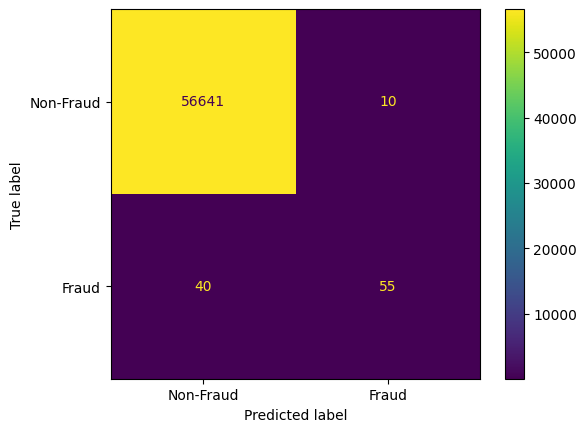

In [480]:
ConfusionMatrixDisplay(conf_matrix_lr, display_labels=["Non-Fraud", "Fraud"]).plot()

In [481]:
lr_performance = ML_models_performance(lr, X_train_values,  y_train, X_test_values, y_test, yhat_lr, y_pred_lr, "Logistic Regression")
lr_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Logistic Regression,0.999242,0.999119,0.846154,0.578947,0.6875,0.956301


## Decision Tree Classifier model 

In [482]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=42 ) 
dt.fit(X_train_values, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [483]:
yhat_dt = dt.predict(X_test_values)

In [484]:
y_pred_dt = dt.predict_proba(X_test_values)
y_pred_dt[0:10]      # Probability of not-Fraud VS Fraud 

array([[9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04],
       [9.99752603e-01, 2.47396811e-04]])

In [485]:
y_pred_dt = y_pred_dt[:,1]
y_pred_dt

array([0.0002474, 0.0002474, 0.0002474, ..., 0.0002474, 0.0002474,
       0.0002474])

In [486]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.868


In [487]:
conf_matrix_dt = confusion_matrix(y_test, yhat_dt)
conf_matrix_dt

array([[56635,    16],
       [   28,    67]])

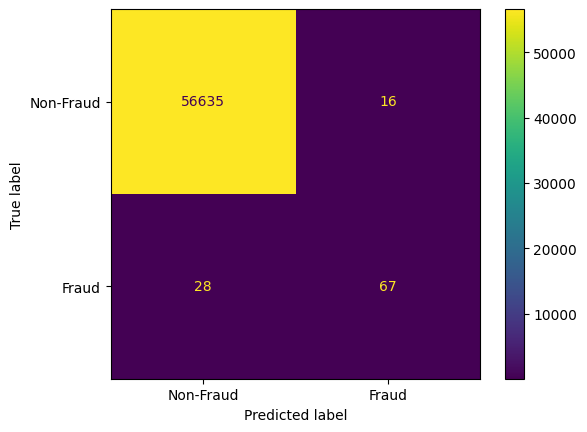

In [488]:
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=["Non-Fraud", "Fraud"]).plot()

In [489]:
print(classification_report(y_test, yhat_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.81      0.71      0.75        95

    accuracy                           1.00     56746
   macro avg       0.90      0.85      0.88     56746
weighted avg       1.00      1.00      1.00     56746



In [490]:
dt_performance = ML_models_performance(dt, X_train_values,  y_train, X_test_values, y_test, yhat_dt, y_pred_dt, "Decision Tree")
dt_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Decision Tree,0.999498,0.999225,0.807229,0.705263,0.752809,0.868257


In [491]:
print ("Accuracy: ", accuracy_score(y_test, yhat_dt))
print ("Precision: ", precision_score(y_test, yhat_dt))
print ("Recall: ", recall_score(y_test, yhat_dt))
print("F1 Score", f1_score(y_test, yhat_dt))

Accuracy:  0.9992246149508336
Precision:  0.8072289156626506
Recall:  0.7052631578947368
F1 Score 0.752808988764045


## SVM Classifier model 

In [492]:
svm = LinearSVC( class_weight='balanced', random_state=42) 
svm.fit(X_train_values, y_train)

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', random_state=42)

In [493]:
yhat_svm = svm.predict(X_test_values)

In [494]:
# y_pred_svm = svm.decision_function(X_test) NB: LinearSVC does not have the attribute .predict_proba() and does not generate probabilities directly.
# y_pred_svm

In [495]:
# roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
# print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

### As LinearSVC does not have the attribute .predict_proba() and does not generate probabilities directly, we can use CalibratedClassifierCV to calculate the probabilities of each Class as LinearSVC does not generate probabilities directly

In [496]:
clf = CalibratedClassifierCV(svm, cv=5)         #Default cv  = 5
clf.fit(X_train_values, y_train)
test_probs_svm = clf.predict_proba(X_test_values)

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [497]:
test_probs_svm

array([[9.99542677e-01, 4.57322796e-04],
       [9.99732573e-01, 2.67426959e-04],
       [9.99900164e-01, 9.98357700e-05],
       ...,
       [9.99366902e-01, 6.33098168e-04],
       [9.99275371e-01, 7.24628902e-04],
       [9.99479406e-01, 5.20593958e-04]])

In [498]:
print(f'Model test roc_auc_score: {roc_auc_score(y_test, test_probs_svm[:, 1]):.3f}')

Model test roc_auc_score: 0.953


In [499]:
conf_matrix_svm = confusion_matrix(y_test, yhat_svm)
conf_matrix_svm

array([[56634,    17],
       [   31,    64]])

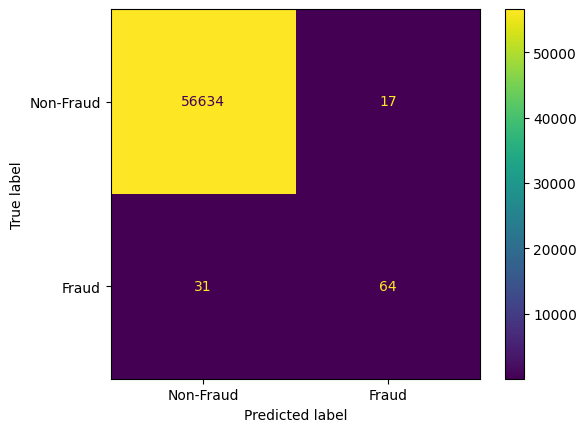

In [500]:
ConfusionMatrixDisplay(conf_matrix_svm, display_labels=["Non-Fraud", "Fraud"]).plot()

In [501]:
print(classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.67      0.73        95

    accuracy                           1.00     56746
   macro avg       0.89      0.84      0.86     56746
weighted avg       1.00      1.00      1.00     56746



In [502]:
svm_performance = ML_models_performance(svm, X_train_values,  y_train, X_test_values, y_test, yhat_svm, test_probs_svm[:, 1], "LinearSVC")
svm_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
LinearSVC,0.999225,0.999154,0.790123,0.673684,0.727273,0.952682


## Random Forest Classifier

In [503]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [504]:
yhat_rf = rf.predict(X_test_values)

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [505]:
y_pred_rf = rf.predict_proba(X_test_values)

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [506]:
y_pred_rf                   #These should be floats. ???

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [507]:
y_pred_rf = y_pred_rf[:,1]
y_pred_rf

array([0., 0., 0., ..., 0., 0., 0.])

In [508]:
print(f'Model test roc_auc_score: {roc_auc_score(y_test, y_pred_rf):.3f}')

Model test roc_auc_score: 0.925


In [509]:
conf_matrix_rf = confusion_matrix(y_test, yhat_rf)
conf_matrix_rf

array([[56649,     2],
       [   28,    67]])

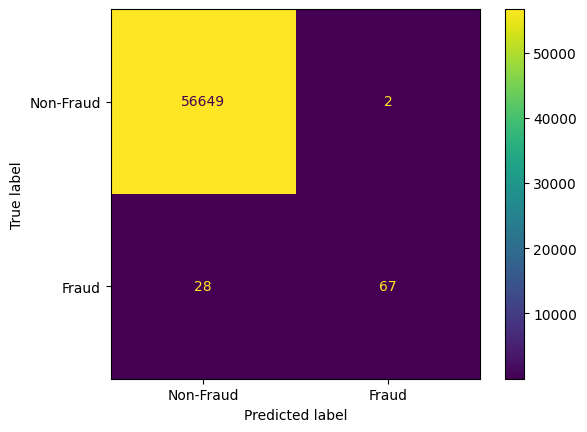

In [510]:
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=["Non-Fraud", "Fraud"]).plot()

In [511]:
print(classification_report(y_test, yhat_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [512]:
rf_performance = ML_models_performance(rf, X_train_values,  y_train, X_test_values, y_test, yhat_rf, y_pred_rf, "Random Forest")
rf_performance

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Random Forest,0.999996,0.999471,0.971014,0.705263,0.817073,0.924607


In [513]:
comparison_df = pd.concat([svm_performance, rf_performance, lr_performance, dt_performance ])
np.round(comparison_df*100, 2)

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
LinearSVC,99.92,99.92,79.01,67.37,72.73,95.27
Random Forest,100.00,99.95,97.10,70.53,81.71,92.46
Logistic Regression,99.92,99.91,84.62,57.89,68.75,95.63
Decision Tree,99.95,99.92,80.72,70.53,75.28,86.83


# Undersampling.  (Droping datasets to make a balanced dataset for ML models)

## Dealing with Imbalance in the data set. 

### Combine the data back from its train test slipt form so we can preserve the transformations we did on Time and Amount. This is becuase I scaled them after spliting to prevent daata leakage

In [514]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
226238,0.836549,2.238954,-1.724499,-2.151484,-2.577803,0.993668,3.565492,-1.785957,0.860122,-1.264003,...,-0.323810,-0.149574,-0.049333,0.278442,0.684735,-0.219028,-0.159167,0.037920,-0.049932,0.137472
134253,0.467128,-1.315062,1.630783,0.597001,-0.038359,-0.404580,-0.965712,0.212249,0.735381,-1.267926,...,-0.067580,-0.238898,-0.946773,0.323904,0.515632,-0.713000,-0.266503,-0.017794,0.051058,-0.209119
186465,0.735659,1.908801,0.021184,-2.087997,0.129310,1.161468,0.605244,-0.022371,0.180296,0.283819,...,-0.210474,0.293609,1.095842,-0.044874,-1.689517,0.106098,0.007758,0.045164,-0.053068,-0.098808
149493,0.528624,1.811257,0.316556,0.316751,3.880231,0.048454,1.020163,-0.734868,0.233651,0.681423,...,-0.228032,0.138869,0.700422,0.174064,0.702997,-0.212523,-0.010018,-0.017740,-0.038006,-0.066242
18461,0.170853,1.358817,-1.120881,0.550266,-1.547659,-1.194950,0.275448,-1.201843,0.212889,-2.094285,...,-0.361686,-0.340972,-0.636442,0.252758,-0.344160,-0.064282,-0.439622,0.062524,0.013095,0.026608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225116,0.834026,-0.098309,-0.382823,0.202726,-0.732301,0.336342,-0.253872,0.837947,-0.402611,-1.424484,...,0.028820,0.154790,1.009327,0.002124,-0.462865,-0.422526,0.010597,0.041090,-0.004501,1.412417
3525,0.017437,-1.708940,-1.296255,1.953170,-2.277028,-0.510388,0.408807,0.329231,0.477331,1.058119,...,0.557379,0.466843,0.860939,0.361317,-0.264732,0.423478,0.065689,-0.026392,0.077562,3.322062
242674,0.877321,-0.875424,1.159992,0.573970,1.178888,-0.206267,0.260623,0.371124,0.443532,-0.011588,...,-0.353885,-0.100597,-0.157726,0.049751,-0.014156,-0.513855,-0.771982,-0.242970,0.094879,0.206763
60594,0.285864,1.247036,0.348595,0.589407,0.982998,-0.222000,-0.452687,-0.012336,-0.140168,0.052173,...,-0.042753,-0.211495,-0.556038,0.037106,-0.133330,0.403622,-0.595756,0.043911,0.032002,-0.236696


In [515]:
y_train

226238    0
134253    0
186465    0
149493    0
18461     0
         ..
225116    0
3525      0
242674    0
60594     0
67057     0
Name: Class, Length: 226980, dtype: int64

In [516]:
# Combine X and y for train and test separately
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Then recombine them into a single dataframe
full_df = pd.concat([train_df, test_df])

In [517]:
full_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
226238,0.836549,2.238954,-1.724499,-2.151484,-2.577803,0.993668,3.565492,-1.785957,0.860122,-1.264003,...,-0.149574,-0.049333,0.278442,0.684735,-0.219028,-0.159167,0.037920,-0.049932,0.137472,0
134253,0.467128,-1.315062,1.630783,0.597001,-0.038359,-0.404580,-0.965712,0.212249,0.735381,-1.267926,...,-0.238898,-0.946773,0.323904,0.515632,-0.713000,-0.266503,-0.017794,0.051058,-0.209119,0
186465,0.735659,1.908801,0.021184,-2.087997,0.129310,1.161468,0.605244,-0.022371,0.180296,0.283819,...,0.293609,1.095842,-0.044874,-1.689517,0.106098,0.007758,0.045164,-0.053068,-0.098808,0
149493,0.528624,1.811257,0.316556,0.316751,3.880231,0.048454,1.020163,-0.734868,0.233651,0.681423,...,0.138869,0.700422,0.174064,0.702997,-0.212523,-0.010018,-0.017740,-0.038006,-0.066242,0
18461,0.170853,1.358817,-1.120881,0.550266,-1.547659,-1.194950,0.275448,-1.201843,0.212889,-2.094285,...,-0.340972,-0.636442,0.252758,-0.344160,-0.064282,-0.439622,0.062524,0.013095,0.026608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56516,0.274689,-1.162452,0.795672,1.953356,1.654216,1.069023,-0.183501,0.093182,0.377642,-1.362161,...,0.258460,0.502164,-0.121908,0.094908,-0.078996,-0.084585,0.093070,0.146178,-0.278271,0
188431,0.740625,-2.023289,2.214345,-2.097511,-1.041892,-0.120896,-0.027650,-0.595211,1.820963,-0.391636,...,-0.202295,-0.810599,0.165183,-0.360040,-0.103692,0.173059,0.060668,-0.003436,-0.167544,0
115561,0.427751,1.180651,-0.199219,1.233565,0.869184,-1.138767,-0.315881,-0.660840,0.103571,1.011595,...,-0.097776,-0.114066,0.037897,0.419476,0.236291,0.318145,0.013352,0.026229,-0.179324,0
187644,0.738593,2.061059,0.136698,-1.830805,0.206364,0.705093,-0.326154,0.107304,-0.093259,0.184680,...,-0.332798,-0.861005,0.274903,0.113347,-0.219966,0.176290,-0.063574,-0.043578,-0.293653,0


In [518]:
not_frauds = full_df.query('Class == 0')
frauds = full_df.query('Class == 1')
display (not_frauds['Class'].value_counts())
display (frauds['Class'].value_counts())

0    283253
Name: Class, dtype: int64

1    473
Name: Class, dtype: int64

In [519]:
UnderSampled_df  = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=42)])

In [520]:
UnderSampled_df['Class'].value_counts()

1    473
0    473
Name: Class, dtype: int64

In [521]:
UnderSampled_df = UnderSampled_df.sample(frac=1, random_state=42)   # Randomize the UnderSampled_df. When frac=1, it means that 100% of the items from the axis (rows by default) will be returned. The primary effect of using frac=1 in df.sample(frac=1) is to randomly shuffle the rows of the DataFrame. While all rows are returned, their order is randomized.
UnderSampled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6446,0.044400,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,...,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,-0.292129,1
73857,0.320102,-6.159607,1.468713,-6.850888,5.174706,-2.986704,-1.795054,-6.545072,2.621236,-3.605870,...,1.061314,0.125737,0.589592,-0.568731,0.582825,-0.042583,0.951130,0.158996,-0.294484,1
142838,0.491730,-0.191939,0.940809,-0.204629,0.249298,2.485396,3.696775,0.114320,0.798655,-0.889089,...,0.103496,0.202800,-0.235479,1.020816,-0.012588,-0.140059,0.045228,0.134009,-0.175721,0
178208,0.714877,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,...,1.775030,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,0.324695,1
154371,0.586329,-25.825982,19.167239,-25.390229,11.125435,-16.682644,3.933699,-37.060311,-28.759799,-11.126624,...,-16.922016,5.703684,3.510019,0.054330,-0.671983,-0.209431,-4.950022,-0.448413,-0.274390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247673,0.889237,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,-2.861986,...,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,3.128880,1
143335,0.493570,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,3.199002,1
198045,0.765649,-0.900581,1.064896,0.006584,-2.578231,0.625617,-1.009676,0.881295,0.304696,-0.023719,...,-0.268207,-0.899416,-0.071991,0.469533,-0.020949,0.357600,0.094499,0.104556,-0.292129,0
64460,0.296050,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,...,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,1.079684,1


In [522]:
# X: feature matrix
X_us = UnderSampled_df.iloc[:, 0:30].values

# y: target variable
y_us= UnderSampled_df.iloc[:, 30]

In [523]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_us, y_us, test_size=0.2, random_state=42) #, stratify= y_us #stratify makes value counts balanced. Maybe test withouth stratification

In [524]:
y_train1.value_counts()

0    388
1    368
Name: Class, dtype: int64

In [525]:
y_test1.value_counts()

1    105
0     85
Name: Class, dtype: int64

In [526]:
lr_us = LogisticRegression()
lr_us.fit(X_train1, y_train1)
lr_us.score(X_train1, y_train1)

0.9484126984126984

In [527]:
yhat_lr_us = lr_us.predict(X_test1)

In [528]:
print ("Accuracy: ", accuracy_score(y_test1, yhat_lr_us))

Accuracy:  0.9578947368421052


In [529]:
print(classification_report(y_test1, yhat_lr_us, target_names=['Not  Fraud', 'Fraud']))

              precision    recall  f1-score   support

  Not  Fraud       0.93      0.98      0.95        85
       Fraud       0.98      0.94      0.96       105

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



In [530]:
y_pred_lr_us = lr_us.predict_proba(X_test1)


In [531]:
roc_auc_lr_us = roc_auc_score(y_test1, y_pred_lr_us[:,1])
print('Undersampled Logistic Regression ROC-AUC score : {0:.6f}'.format(roc_auc_lr_us))

Undersampled Logistic Regression ROC-AUC score : 0.983529


In [532]:
lr_us_performance = ML_models_performance(lr_us, X_train1,  y_train1, X_test1, y_test1, yhat_lr_us, y_pred_lr_us[:,1], "Balanced Undersampled Logistic Regression")
lr_us_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Undersampled Logistic Regression,0.948413,0.957895,0.980198,0.942857,0.961165,0.983529


array([[83,  2],
       [ 6, 99]])

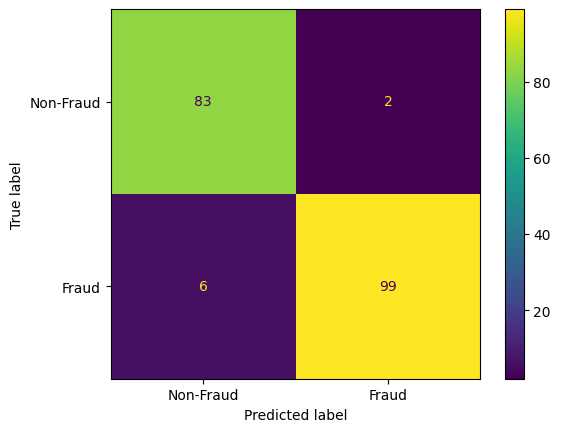

In [533]:
conf_matrix_lr_us = confusion_matrix(y_test1, yhat_lr_us)
display (conf_matrix_lr_us)
ConfusionMatrixDisplay(conf_matrix_lr_us, display_labels=["Non-Fraud", "Fraud"]).plot()

## Decisiontree Undersampling

In [534]:
dt_us = DecisionTreeClassifier(max_depth=4, random_state=42 ) 
dt_us.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [535]:
yhat_dt_us = dt_us.predict(X_test1)
print(classification_report(y_test1, yhat_dt_us, target_names=['Not  Fraud', 'Fraud']))

              precision    recall  f1-score   support

  Not  Fraud       0.91      0.99      0.95        85
       Fraud       0.99      0.92      0.96       105

    accuracy                           0.95       190
   macro avg       0.95      0.96      0.95       190
weighted avg       0.96      0.95      0.95       190



In [536]:
y_pred_dt_us = dt_us.predict_proba(X_test1)

In [537]:
dt_us_performance = ML_models_performance(dt_us, X_train1,  y_train1, X_test1, y_test1, yhat_dt_us, y_pred_dt_us[:,1], "Balanced Undersampled Decision Tree")
dt_us_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Undersampled Decision Tree,0.956349,0.952632,0.989796,0.92381,0.955665,0.966106


array([[84,  1],
       [ 8, 97]])

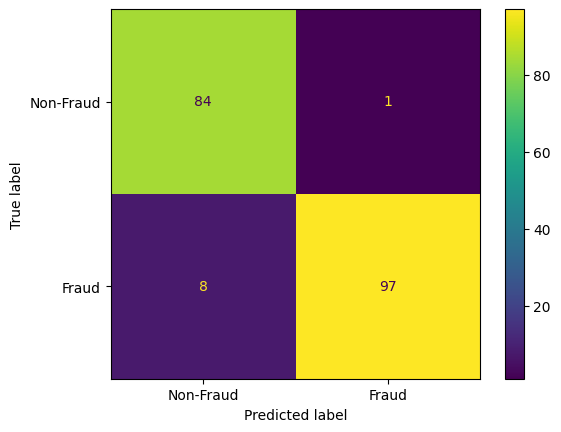

In [538]:
conf_matrix_dt_us = confusion_matrix(y_test1, yhat_dt_us)
display (conf_matrix_dt_us)
ConfusionMatrixDisplay(conf_matrix_dt_us, display_labels=["Non-Fraud", "Fraud"]).plot()

## SVM

In [539]:
svm_us = LinearSVC( class_weight='balanced', random_state=42)
svm_us.fit(X_train1, y_train1)

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', random_state=42)

In [540]:
yhat_svm_us = svm_us.predict(X_test1)
print(classification_report(y_test1, yhat_svm_us, target_names=['Not  Fraud', 'Fraud']))

              precision    recall  f1-score   support

  Not  Fraud       0.93      0.98      0.95        85
       Fraud       0.98      0.94      0.96       105

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



In [541]:
clf_us = CalibratedClassifierCV(svm_us, cv=5)         #Default cv  = 5
clf_us.fit(X_train1, y_train1)
test_probs_svm_us = clf_us.predict_proba(X_test1)

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [542]:
svm_us_performance = ML_models_performance(svm_us, X_train1,  y_train1, X_test1, y_test1, yhat_svm_us, test_probs_svm_us[:,1], "Balanced Undersampled LinearSVC")
svm_us_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Undersampled LinearSVC,0.948413,0.957895,0.980198,0.942857,0.961165,0.974566


array([[83,  2],
       [ 6, 99]])

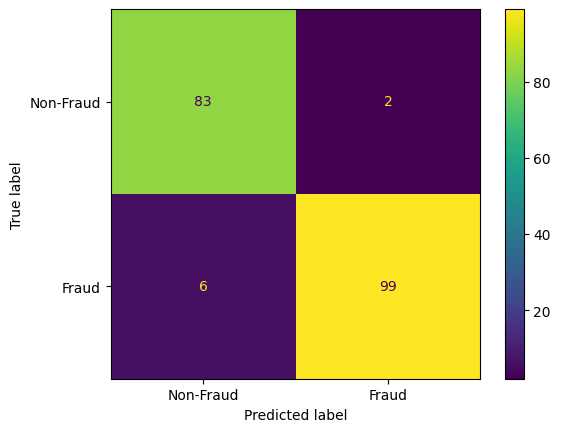

In [543]:
conf_matrix_svm_us = confusion_matrix(y_test1, yhat_svm_us)
display (conf_matrix_svm_us)
ConfusionMatrixDisplay(conf_matrix_svm_us, display_labels=["Non-Fraud", "Fraud"]).plot()

## Random Forest Classifier Undersampled. 

In [544]:
rf_us = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_us.fit(X_train1, y_train1)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [545]:
yhat_rf_us = rf_us.predict(X_test1)
y_pred_rf_us = rf_us.predict_proba(X_test1)

In [546]:
print(f'Model test roc_auc_score: {roc_auc_score(y_test1, y_pred_rf_us[:,1]):.3f}')

Model test roc_auc_score: 0.984


In [547]:
print(classification_report(y_test1, yhat_rf_us))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        85
           1       0.99      0.91      0.95       105

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



array([[84,  1],
       [ 9, 96]])

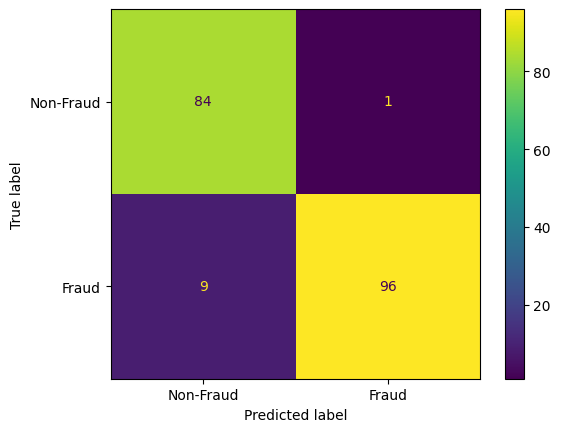

In [548]:
conf_matrix_rf_us = confusion_matrix(y_test1, yhat_rf_us)
display (conf_matrix_rf_us)
ConfusionMatrixDisplay(conf_matrix_rf_us, display_labels=["Non-Fraud", "Fraud"]).plot()

In [549]:
rf_us_performance = ML_models_performance(rf_us, X_train1,  y_train1, X_test1, y_test1, yhat_rf_us, y_pred_rf_us[:,1], "Balanced Undersampled Random Forest")
rf_us_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Undersampled Random Forest,1.0,0.947368,0.989691,0.914286,0.950495,0.98437


In [550]:
comparison_df_us = pd.concat([lr_us_performance, dt_us_performance, svm_us_performance, rf_us_performance ])
np.round(comparison_df_us*100, 2)

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Undersampled Logistic Regression,94.84,95.79,98.02,94.29,96.12,98.35
Balanced Undersampled Decision Tree,95.63,95.26,98.98,92.38,95.57,96.61
Balanced Undersampled LinearSVC,94.84,95.79,98.02,94.29,96.12,97.46
Balanced Undersampled Random Forest,100.00,94.74,98.97,91.43,95.05,98.44


In [551]:
np.round(comparison_df*100, 2)

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
LinearSVC,99.92,99.92,79.01,67.37,72.73,95.27
Random Forest,100.00,99.95,97.10,70.53,81.71,92.46
Logistic Regression,99.92,99.91,84.62,57.89,68.75,95.63
Decision Tree,99.95,99.92,80.72,70.53,75.28,86.83


# Oversampling.  Using SMOTE                (Droping datasets to make a balanced dataset for ML models)

In [552]:
full_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
226238,0.836549,2.238954,-1.724499,-2.151484,-2.577803,0.993668,3.565492,-1.785957,0.860122,-1.264003,...,-0.149574,-0.049333,0.278442,0.684735,-0.219028,-0.159167,0.037920,-0.049932,0.137472,0
134253,0.467128,-1.315062,1.630783,0.597001,-0.038359,-0.404580,-0.965712,0.212249,0.735381,-1.267926,...,-0.238898,-0.946773,0.323904,0.515632,-0.713000,-0.266503,-0.017794,0.051058,-0.209119,0
186465,0.735659,1.908801,0.021184,-2.087997,0.129310,1.161468,0.605244,-0.022371,0.180296,0.283819,...,0.293609,1.095842,-0.044874,-1.689517,0.106098,0.007758,0.045164,-0.053068,-0.098808,0
149493,0.528624,1.811257,0.316556,0.316751,3.880231,0.048454,1.020163,-0.734868,0.233651,0.681423,...,0.138869,0.700422,0.174064,0.702997,-0.212523,-0.010018,-0.017740,-0.038006,-0.066242,0
18461,0.170853,1.358817,-1.120881,0.550266,-1.547659,-1.194950,0.275448,-1.201843,0.212889,-2.094285,...,-0.340972,-0.636442,0.252758,-0.344160,-0.064282,-0.439622,0.062524,0.013095,0.026608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56516,0.274689,-1.162452,0.795672,1.953356,1.654216,1.069023,-0.183501,0.093182,0.377642,-1.362161,...,0.258460,0.502164,-0.121908,0.094908,-0.078996,-0.084585,0.093070,0.146178,-0.278271,0
188431,0.740625,-2.023289,2.214345,-2.097511,-1.041892,-0.120896,-0.027650,-0.595211,1.820963,-0.391636,...,-0.202295,-0.810599,0.165183,-0.360040,-0.103692,0.173059,0.060668,-0.003436,-0.167544,0
115561,0.427751,1.180651,-0.199219,1.233565,0.869184,-1.138767,-0.315881,-0.660840,0.103571,1.011595,...,-0.097776,-0.114066,0.037897,0.419476,0.236291,0.318145,0.013352,0.026229,-0.179324,0
187644,0.738593,2.061059,0.136698,-1.830805,0.206364,0.705093,-0.326154,0.107304,-0.093259,0.184680,...,-0.332798,-0.861005,0.274903,0.113347,-0.219966,0.176290,-0.063574,-0.043578,-0.293653,0


In [553]:
full_df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [554]:
# X: feature matrix
X_os = full_df.iloc[:, 0:30].values

# y: target variable
y_os= full_df.iloc[:, 30]

In [555]:
from imblearn.over_sampling import SMOTE

In [556]:
X_res, y_res =SMOTE().fit_resample(X_os, y_os)

In [557]:
X_res.shape

(566506, 30)

In [558]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [559]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [560]:
lr_os = LogisticRegression()
lr_os.fit(X_train2, y_train2)
lr_os.score(X_train2, y_train2)

0.9465141525670558

In [561]:
yhat_lr_os = lr_os.predict(X_test2)
print ("Accuracy: ", accuracy_score(y_test2, yhat_lr_os))
print(classification_report(y_test2, yhat_lr_os, target_names=['Not  Fraud', 'Fraud']))

Accuracy:  0.9478561720004942
              precision    recall  f1-score   support

  Not  Fraud       0.92      0.98      0.95     56469
       Fraud       0.98      0.92      0.95     56833

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



In [562]:
y_pred_lr_os = lr_os.predict_proba(X_test2)
roc_auc_lr_os = roc_auc_score(y_test2, y_pred_lr_os[:,1])
print('Oversampled Logistic Regression ROC-AUC score : {0:.6f}'.format(roc_auc_lr_os))

Oversampled Logistic Regression ROC-AUC score : 0.989007


In [563]:
lr_os_performance = ML_models_performance(lr_os, X_train2,  y_train2, X_test2, y_test2, yhat_lr_os, y_pred_lr_os[:,1], "Balanced Oversampled Logistic Regression")
lr_os_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Oversampled Logistic Regression,0.946514,0.947856,0.975233,0.919395,0.946491,0.989007


array([[55142,  1327],
       [ 4581, 52252]])

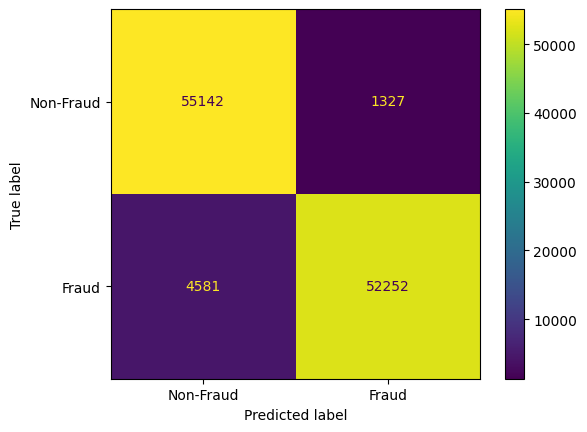

In [564]:
conf_matrix_lr_os = confusion_matrix(y_test2, yhat_lr_os)
display (conf_matrix_lr_os)
ConfusionMatrixDisplay(conf_matrix_lr_os, display_labels=["Non-Fraud", "Fraud"]).plot()

In [565]:
dt_os = DecisionTreeClassifier(max_depth=4, random_state=42 ) 
dt_os.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [566]:
yhat_dt_os = dt_os.predict(X_test2)
print(classification_report(y_test2, yhat_dt_os, target_names=['Not  Fraud', 'Fraud']))

              precision    recall  f1-score   support

  Not  Fraud       0.91      0.97      0.94     56469
       Fraud       0.97      0.91      0.94     56833

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.94    113302
weighted avg       0.94      0.94      0.94    113302



In [567]:
y_pred_dt_os = dt_os.predict_proba(X_test2)
dt_os_performance = ML_models_performance(dt_os, X_train2,  y_train2, X_test2, y_test2, yhat_dt_os, y_pred_dt_os[:,1], "Balanced Oversampled Decision Tree")
dt_os_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Oversampled Decision Tree,0.938888,0.938951,0.966313,0.910017,0.93732,0.980745


array([[54666,  1803],
       [ 5114, 51719]])

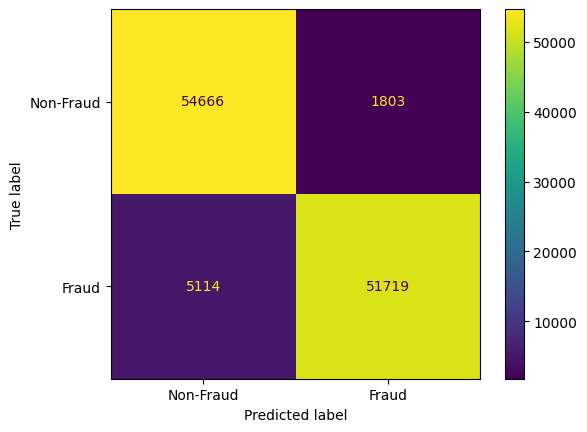

In [568]:
conf_matrix_dt_os = confusion_matrix(y_test2, yhat_dt_os)
display (conf_matrix_dt_os)
ConfusionMatrixDisplay(conf_matrix_dt_os, display_labels=["Non-Fraud", "Fraud"]).plot()

In [569]:
svm_os = LinearSVC( class_weight='balanced', random_state=42)
svm_os.fit(X_train2, y_train2)

/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', random_state=42)

In [570]:
yhat_svm_os = svm_os.predict(X_test2)
print(classification_report(y_test2, yhat_svm_os, target_names=['Not  Fraud', 'Fraud']))

              precision    recall  f1-score   support

  Not  Fraud       0.91      0.98      0.95     56469
       Fraud       0.98      0.91      0.94     56833

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302



In [571]:
clf_os = CalibratedClassifierCV(svm_os, cv=5)         #Default cv  = 5
clf_os.fit(X_train2, y_train2)
test_probs_svm_os = clf_os.predict_proba(X_test2)
svm_os_performance = ML_models_performance(svm_os, X_train2,  y_train2, X_test2, y_test2, yhat_svm_os, test_probs_svm_os[:,1], "Balanced Oversampled LinearSVC")
svm_os_performance


/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/olamideolayinka/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Oversampled LinearSVC,0.942445,0.943478,0.977538,0.908187,0.941587,0.98895


array([[55283,  1186],
       [ 5218, 51615]])

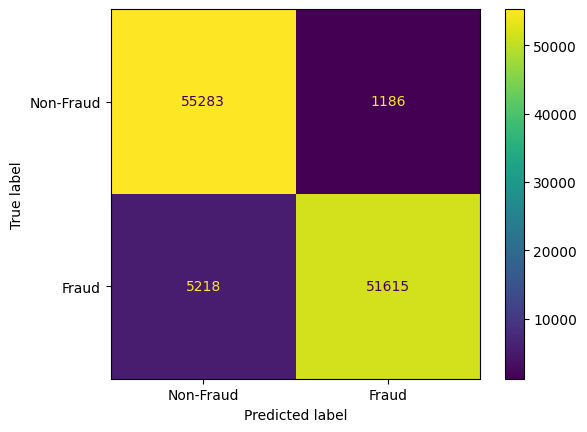

In [572]:
conf_matrix_svm_os = confusion_matrix(y_test2, yhat_svm_os)
display (conf_matrix_svm_os)
ConfusionMatrixDisplay(conf_matrix_svm_os, display_labels=["Non-Fraud", "Fraud"]).plot()

In [573]:
rf_os = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_os.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [574]:
yhat_rf_os = rf_os.predict(X_test2)
y_pred_rf_os = rf_os.predict_proba(X_test2)
print(f'Model test roc_auc_score: {roc_auc_score(y_test2, y_pred_rf_os[:,1]):.3f}')

Model test roc_auc_score: 1.000


In [575]:
rf_os_performance = ML_models_performance(rf_os, X_train2,  y_train2, X_test2, y_test2, yhat_rf_os, y_pred_rf_os[:,1], "Balanced Oversampled Random Forest")
rf_os_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Oversampled Random Forest,1.0,0.999938,0.999877,1.0,0.999938,0.999999


In [576]:
print(classification_report(y_test2, yhat_rf_os))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56469
           1       1.00      1.00      1.00     56833

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



array([[56462,     7],
       [    0, 56833]])

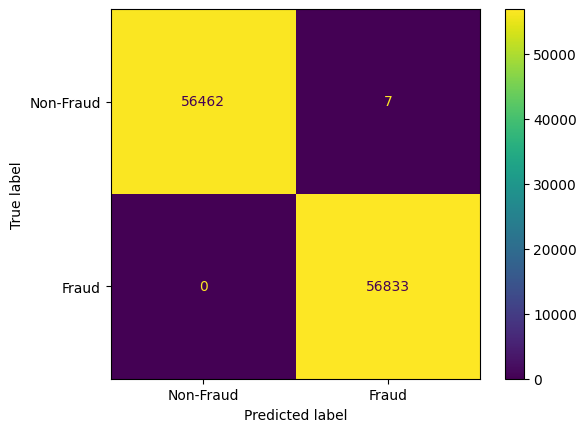

In [577]:
conf_matrix_rf_os = confusion_matrix(y_test2, yhat_rf_os)
display (conf_matrix_rf_os)
ConfusionMatrixDisplay(conf_matrix_rf_os, display_labels=["Non-Fraud", "Fraud"]).plot()

In [578]:
comparison_df_os = pd.concat([lr_os_performance, dt_os_performance, svm_os_performance, rf_os_performance ])

In [582]:
np.round(comparison_df_os*100, 2).sort_values(by=['Recall','roc_auc_score'], ascending=False)

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Oversampled Random Forest,100.00,99.99,99.99,100.00,99.99,100.00
Balanced Oversampled Logistic Regression,94.65,94.79,97.52,91.94,94.65,98.90
Balanced Oversampled Decision Tree,93.89,93.90,96.63,91.00,93.73,98.07
Balanced Oversampled LinearSVC,94.24,94.35,97.75,90.82,94.16,98.89


In [583]:
np.round(comparison_df_us*100, 2).sort_values(by=['Recall','roc_auc_score'], ascending=False)

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Balanced Undersampled Logistic Regression,94.84,95.79,98.02,94.29,96.12,98.35
Balanced Undersampled LinearSVC,94.84,95.79,98.02,94.29,96.12,97.46
Balanced Undersampled Decision Tree,95.63,95.26,98.98,92.38,95.57,96.61
Balanced Undersampled Random Forest,100.00,94.74,98.97,91.43,95.05,98.44


In [ ]:
np.round(comparison_df*100, 2).sort_values(by=['Recall','roc_auc_score'], ascending=False)  #Base model - Trained on the original (imbalanced) dataset,

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score,roc_auc_score
Random Forest,100.00,99.95,97.10,70.53,81.71,92.46
Decision Tree,99.95,99.92,80.72,70.53,75.28,86.83
LinearSVC,99.92,99.92,79.01,67.37,72.73,95.27
Logistic Regression,99.92,99.91,84.62,57.89,68.75,95.63
